# *k-d tree* algorithm case study - Iris Flower Species Classification

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.<br> 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

The dataset consists 6 attributes: <br>
1. Id - an unique Id for each tuple
1. sepal length(cm)
2. sepal width(cm)
3. petal length(cm)
4. petal width(cm)
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

### Using sklearn k-d tree library to find the nearest neighbour

In [1]:
# Import required libraries

# pandas: A python library used for data manipulation.
# numpy: A python library used for arithmetic operations on arrays.
import pandas as pd
import numpy as np

# To split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# To build a KDTree
from sklearn.neighbors import KDTree

# Import scikit-learn metrics module to calculate the model metrics like accuracy, precision, recall...
from sklearn import metrics

# To estimate best parameters for the model
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading the data
# pandas.read_csv is used to load the files with csv format
iris_data = pd.read_csv('IrisSpeciesClassification.csv')

In [3]:
# Previewing our data using the code below.
# DataFrame.head() method is used to display the first 5 rows from the data.
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dropping 'Id' column
iris_data.drop('Id', axis=1, inplace=True)

In [5]:
# Previewing data after droping 'Id'.
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Shape of the data i.e (rows, columns)
iris_data.shape

(150, 5)

In [7]:
# Label Encoding the Species target variable
# Iris Setosa: 0
# Iris Versicolor: 1
# Iris Virginica: 2
# Used when measuring the k-d tree model metrics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_data['Species'] = le.fit_transform(iris_data['Species'])

In [8]:
# Previewing the data after encoding Species variable
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# X contains independent variables
# y contains the target variable
# DataFrame.drop() method is used to drop a feature from the dataset. 
# axis=1 tells the drop method to drop the column.
x = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [10]:
# Split data using train_test_split
# train_test_split splits X and y randomly
# test_size tells the portion of data to select for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Model Building

In [11]:
# k-d tree construction
kdt = KDTree(np.array(x_train), leaf_size=15, metric='euclidean')

# k=1 i.e searching for the nearest neighbour
neighbour = kdt.query(x_test, k=1, return_distance=False)

neighbour returns indices of the nearest neighbour to each datapoint in x_test

In [12]:
neighbour

array([[ 44],
       [116],
       [106],
       [ 67],
       [ 28],
       [ 61],
       [  4],
       [ 42],
       [ 97],
       [ 36],
       [107],
       [113],
       [ 41],
       [ 95],
       [113],
       [103],
       [119],
       [ 77],
       [ 82],
       [ 22],
       [ 60],
       [  4],
       [106],
       [ 92],
       [ 31],
       [118],
       [114],
       [ 58],
       [116],
       [ 36]])

In [13]:
# Reshaping the index values
neighbour.reshape(-1,1).shape

(30, 1)

In [14]:
# Retrieving the class labels from the neighbour index
y_pred = []
for i in neighbour.ravel():
    y_pred.append(iris_data['Species'].iloc[i])

In [15]:
# Converting the predicted class labels into numpy array
y_pred = np.array(y_pred)

Accuracy

In [16]:
# accuracy_score tells the overall accuracy of a model
print(metrics.accuracy_score(y_test, y_pred))

0.4


Precision

In [17]:
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and 
# fp the number of false positives. 
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
print(metrics.precision_score(y_test, y_pred, average='weighted'))

0.39451178451178454


Recall

In [18]:
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and 
# fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.
print(metrics.recall_score(y_test, y_pred, average='weighted'))

0.4


### Finding K neareset neighbours to increase the classification accuracy
We will use sklearn KNeighborsClassifier to find K nearest neighbours and predict the class of a datapoint.

#### Reason why we are using KNeighborsClassifier instead of KDTree or NearestNeighbors.
##### sklearn.neighbors.KDTree:<br>
Not proper scikit-learn estimators<br>
query returns (distances, indices)<br>
##### sklearn.neighbors.NearestNeighbors:<br>
scikit-learn estimator, but without transform or predict<br>
kneighbors returns (distances, indices)
##### sklearn.neighbors.KNeighborsClassifier,RadiusNeighborsClassifier: <br>
Inherit fit and kneighbors from NearestNeighbors

### Model Building

In [19]:
# Importing KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# 1. Instantiate

# n_neighbors: Number of neighbors to use by default for kneighbors queries.
# algorithm: Algorithm used to compute the nearest neighbors
knn = KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')

# 2. Fit
knn.fit(x_train, y_train)

# 3. Predict
knn_pred = knn.predict(x_test)

Accuracy

In [20]:
print(metrics.accuracy_score(y_test, knn_pred))

0.9


Precision

In [21]:
print(metrics.precision_score(y_test, knn_pred, average='weighted'))

0.925


Recall

In [22]:
print(metrics.recall_score(y_test, knn_pred, average='weighted'))

0.9


#### Although the dataset isn't too large and doesn't require any parameter tuning, just look at how parameter tuning is performed using Cross Validation.

In [23]:
# Creating a parameter grid: maps the parameter names to the values that should be searched,
# n_neighbours: Number of neighbors to use by default for kneighbors queries.
# weights: weight function used in prediction.
# metric: the distance metric to use for the tree. 
# leaf_size: Leaf size passed to KDTree.
param_grid = {
        'n_neighbors':[6, 8, 10, 12],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
        'leaf_size': [10, 15, 20, 25, 30, 35]
}

# instantiate the grid,
# cv = 10 represents that split the data into 10 folds
grid = GridSearchCV(KNeighborsClassifier(algorithm='kd_tree'), param_grid, cv=10)

# fit the grid with data
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [10, 15, 20, 25, 30, 35],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [6, 8, 10, 12],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
# Best Parameters used to fit the model for higher accuracy
grid.best_params_

{'leaf_size': 10,
 'metric': 'euclidean',
 'n_neighbors': 6,
 'weights': 'uniform'}

In [25]:
# Using the best parameters suggested by cross validation

# 1. Instantiate
knn_cv = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree', 
                              metric='euclidean', weights='uniform', leaf_size=10)
# 2. Fit
knn_cv.fit(x_train, y_train)

# 3. Predict
knn_cv_pred = knn_cv.predict(x_test)

Accuracy

In [26]:
print(metrics.accuracy_score(y_test, knn_cv_pred))

0.9


Precision

In [27]:
print(metrics.precision_score(y_test, knn_cv_pred, average='weighted'))

0.925


Recall

In [28]:
print(metrics.recall_score(y_test, knn_cv_pred, average='weighted'))

0.9


### Confuision Matrix usage to evaluate the quality of the output of knn classifier using *k-d tree* on the iris data set.

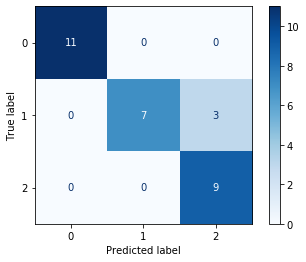

In [29]:
metrics.plot_confusion_matrix(knn_cv, x_test, y_test, cmap='Blues')

Though *k-d trees* reduce the complexity of KNN computations, it cannot deal with high dimensional data!<b>